In [5]:
import numpy as np

arr = np.random.randint(1, 51, (8,8))

odd = []
even = []
for row in arr:

    for num in row:
        if num % 2 == 0:
            even.append(num)
        else:
            odd.append(num)

mean_arr = np.mean(arr)
print("Matrix:\n", arr)
print("\nOdd numbers:", odd)
print("\nEven numbers:", even)
print("\nMean of matrix:", mean_arr)
arr = arr.reshape(4, 16)
print("\nReshaped Matrix (4x16):\n", arr)
upsampled = np.zeros((16, 16), dtype=int)
print(upsampled)


Matrix:
 [[18 24 28  5  6 43  8 22]
 [26 28 37 50 32 15  8 44]
 [ 8 28  9 14 39  4 12  6]
 [48 17 38  2 16 50 50  2]
 [48  3  9 14 42 11  2 26]
 [33 35 43 29 45 24 15 12]
 [30 33 32 29 43 31  2 37]
 [38  1 23 13  3 15 46  2]]

Odd numbers: [np.int64(5), np.int64(43), np.int64(37), np.int64(15), np.int64(9), np.int64(39), np.int64(17), np.int64(3), np.int64(9), np.int64(11), np.int64(33), np.int64(35), np.int64(43), np.int64(29), np.int64(45), np.int64(15), np.int64(33), np.int64(29), np.int64(43), np.int64(31), np.int64(37), np.int64(1), np.int64(23), np.int64(13), np.int64(3), np.int64(15)]

Even numbers: [np.int64(18), np.int64(24), np.int64(28), np.int64(6), np.int64(8), np.int64(22), np.int64(26), np.int64(28), np.int64(50), np.int64(32), np.int64(8), np.int64(44), np.int64(8), np.int64(28), np.int64(14), np.int64(4), np.int64(12), np.int64(6), np.int64(48), np.int64(38), np.int64(2), np.int64(16), np.int64(50), np.int64(50), np.int64(2), np.int64(48), np.int64(14), np.int64(42), n

In [14]:
import pandas as pd
import numpy as np

names = ["Amin", "Sara", "Ali", "Reza", "Mina"]
n = 50
df = pd.DataFrame({
    "Name": np.random.choice(names, size=n),
    "Age": np.random.randint(18, 61, size=n),
    "Score": np.random.choice(
        list(np.random.randint(10, 101, 40)) + ["error", "bad"],
        size=n
    )
})
invalid_row=df[pd.to_numeric(df["Score"],errors="coerce").isna()]
print(invalid_row)
print("----------------------------------------")
df["Score"]=pd.to_numeric(df["Score"],errors="coerce")
df_clean=df.dropna()
print(df_clean)
print("----------------------------------------")
mean_age=df["Age"].mean()
print(mean_age)
print("----------------------------------------")

percentage = (df_clean["Score"] > 80).mean() * 100
print(percentage)


    Name  Age  Score
39  Amin   18  error
44  Reza   30  error
----------------------------------------
    Name  Age  Score
0    Ali   21   57.0
1   Reza   26   85.0
2   Sara   59   68.0
3   Sara   60   33.0
4   Sara   25   34.0
5   Amin   52   44.0
6    Ali   53   20.0
7   Mina   44   40.0
8   Mina   30   53.0
9   Reza   47   38.0
10  Sara   55   38.0
11  Reza   30   57.0
12  Mina   21   48.0
13   Ali   60   23.0
14  Amin   38   17.0
15  Reza   43   37.0
16  Reza   50   61.0
17  Sara   57   87.0
18  Sara   60   45.0
19  Sara   22   67.0
20  Amin   40   53.0
21  Mina   22   82.0
22  Reza   51   37.0
23  Amin   50   40.0
24  Reza   35   48.0
25  Amin   27   73.0
26  Mina   48   25.0
27   Ali   41   59.0
28  Reza   56   61.0
29  Amin   51   89.0
30  Reza   24   23.0
31  Reza   26   48.0
32   Ali   43   96.0
33  Reza   33   23.0
34  Mina   19   53.0
35  Mina   32   88.0
36  Sara   48   87.0
37   Ali   33   33.0
38   Ali   27   23.0
40  Sara   22   48.0
41  Reza   59   87.0
42  Reza   47 

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

np.random.seed(42)
n = 300
age = np.random.randint(18, 61, n)
salary = np.random.randint(20000, 120001, n)

bought = []

for a, s in zip(age, salary):
    if s > 75000 and a < 40:
        prob = 0.85
    else:
        prob = 0.25

    bought.append(np.random.choice([1, 0], p=[prob, 1 - prob]))
df = pd.DataFrame({
    "Age": age,
    "Salary": salary,
    "Bought": bought
})
x=df[["Age","Salary"]]
y=df["Bought"]
model=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_pred,y_test)
print(acc)
cl_r=classification_report(y_pred,y_test)
print(cl_r)
cm=confusion_matrix(y_pred,y_test)
print(cm)

new_person=np.array([[32,90000]])
prediction=model.predict(new_person)[0]
probability = model.predict_proba(new_person)[0]
print(prediction)
print(probability)

0.75
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.58      0.74      0.65        19

    accuracy                           0.75        60
   macro avg       0.72      0.75      0.73        60
weighted avg       0.77      0.75      0.76        60

[[31 10]
 [ 5 14]]
1
[0.42700874 0.57299126]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9986949540711306
[312.59887767]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


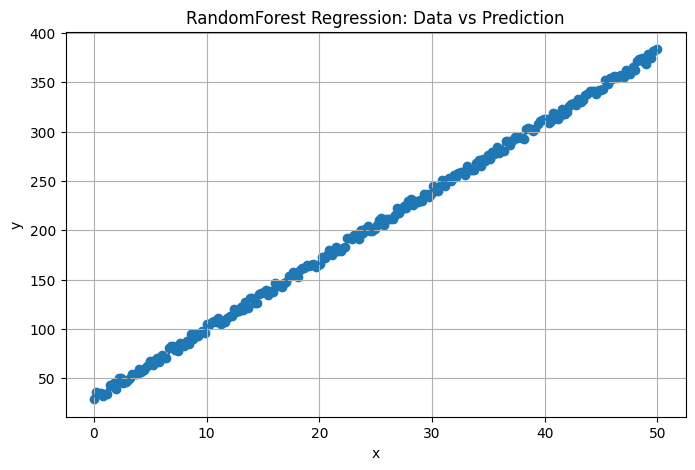

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

np.random.seed(42)
n = 250
x = np.linspace(0, 50, n)
noise = np.random.uniform(5, 15, n)
y = 7 * x + 20 + noise

df = pd.DataFrame({
    "x": x,
    "y": y
})

x = df[["x"]]
y = df["y"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
model=RandomForestRegressor(
    n_estimators=150,
    random_state=42
)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

r2=r2_score(y_pred,y_test)
print(r2)

x_new=np.array([[40]])
y_new=model.predict(x_new)
print(y_new)


x_sorted = np.sort(x.values.reshape(-1, 1), axis=0)
y_model_pred = model.predict(x_sorted)
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.plot(x_sorted, y_model_pred)
plt.xlabel("x")
plt.ylabel("y")
plt.title("RandomForest Regression: Data vs Prediction")
plt.grid(True)

plt.show()


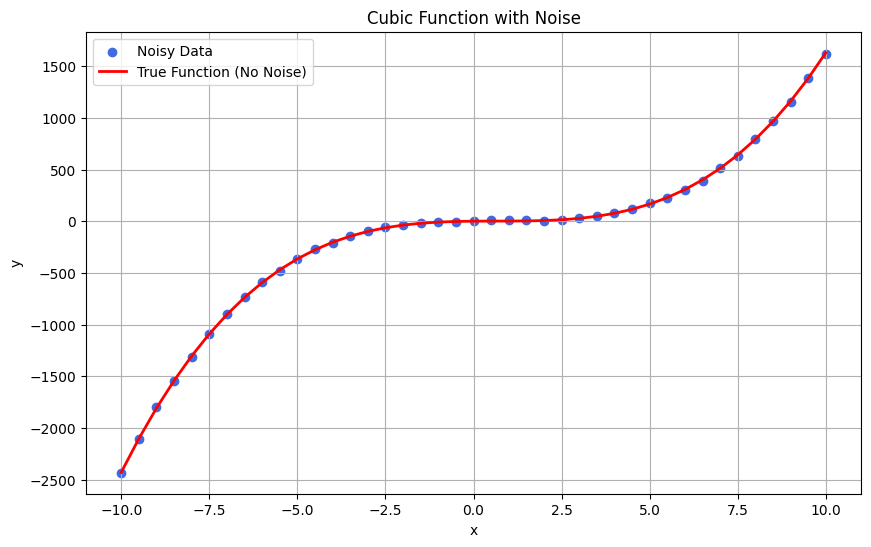

In [28]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(-10, 10.5, 0.5)
noise = np.random.uniform(-10, 10, len(x))
y = 2*(x**3) - 4*(x**2) + 3*x + noise
y_clean = 2*(x**3) - 4*(x**2) + 3*x



plt.figure(figsize=(10,6))
plt.scatter(x, y, color="royalblue", label="Noisy Data")
plt.plot(x, y_clean, color="red", linewidth=2, label="True Function (No Noise)")


plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic Function with Noise")
plt.legend()
plt.grid(True)

plt.show()
